In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/heart-stroke-data/heart-data-discretized.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2,1,0,1,0,0,1,3,0,0,2,2,3,0
1,2,1,0,2,0,1,0,3,1,2,0,0,3,0
2,4,1,0,2,0,0,1,2,1,2,0,0,3,0
3,3,1,0,2,0,0,1,3,0,0,2,1,3,0
4,3,0,0,2,1,1,1,1,0,1,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,3,1,1,2,1,0,1,3,1,0,2,0,2,1
1021,3,1,0,1,1,0,0,2,1,2,1,1,3,0
1022,1,1,0,0,1,0,0,1,1,0,1,1,2,0
1023,2,0,0,0,1,0,0,3,0,0,2,0,2,1


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Datasets/heart-stroke-data/heart-data-discretized-train.csv')
train_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2,1,0,1,0,0,1,3,0,0,2,2,3,0
1,2,1,0,2,0,1,0,3,1,2,0,0,3,0
2,4,1,0,2,0,0,1,2,1,2,0,0,3,0
3,3,1,0,2,0,0,1,3,0,0,2,1,3,0
4,3,0,0,2,1,1,1,1,0,1,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,2,1,0,1,1,0,1,0,1,1,1,2,3,0
809,1,1,0,0,0,0,0,3,0,0,2,0,3,0
810,3,1,1,2,1,0,1,3,1,0,2,0,2,1
811,1,1,0,0,1,0,0,1,1,0,1,1,2,0


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Datasets/heart-stroke-data/heart-data-discretized-test.csv')
test_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,3,1,0,0,2,0,2,2,0,3,0,3,1,0
1,1,1,0,1,1,0,0,2,0,0,2,0,3,0
2,0,0,1,1,0,0,1,4,0,0,2,0,2,1
3,3,0,0,2,2,0,0,2,1,0,1,0,3,0
4,2,0,0,4,2,0,2,1,1,2,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2,1,0,2,1,0,1,3,1,1,2,0,3,0
208,3,1,3,2,1,1,0,3,0,1,1,1,2,0
209,1,1,0,0,0,0,1,2,0,0,2,0,2,1
210,3,1,0,1,1,0,0,2,1,2,1,1,3,0


In [ ]:
X_train, y_train, X_test, y_test = train_df.drop(['target'], axis=1), train_df['target'], test_df.drop(['target'], axis=1), test_df['target']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((813, 13), (813,), (212, 13), (212,))

In [ ]:
model1 = MultinomialNB()
model1.fit(X_train, y_train)

preds = model1.predict(X_test)
acc1, pre1, rec1, f1s1, roc1, con1, cls1 = accuracy_score(y_test, preds), precision_score(y_test, preds), recall_score(y_test, preds), f1_score(y_test, preds), roc_auc_score(y_test, preds), confusion_matrix(y_test, preds), classification_report(y_test, preds)
print('Multinomial Naive Bayes Model trained on the descritized Heart Data:')
print('Accuracy: ', acc1)
print('Precision: ', pre1)
print('Recall: ', rec1)
print('F1-Score: ', f1s1)
print('ROC AUC Score: ', roc1)
print('Confusion Matrix:\n', con1)
print('Classification Report:\n', cls1)

Multinomial Naive Bayes Model trained on the descritized Heart Data:
Accuracy:  0.8160377358490566
Precision:  0.7720588235294118
Recall:  0.9292035398230089
F1-Score:  0.8433734939759037
ROC AUC Score:  0.8080361133458478
Confusion Matrix:
 [[ 68  31]
 [  8 105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.69      0.78        99
           1       0.77      0.93      0.84       113

    accuracy                           0.82       212
   macro avg       0.83      0.81      0.81       212
weighted avg       0.83      0.82      0.81       212



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/heart-stroke-data/heart-data-original.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Datasets/heart-stroke-data/heart-data-original-train.csv')
train_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
809,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
810,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
811,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Datasets/heart-stroke-data/heart-data-original-test.csv')
test_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
1,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
2,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
3,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0
4,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
208,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
209,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
210,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0


In [ ]:
X_train, y_train, X_test, y_test = train_df.drop(['target'], axis=1), train_df['target'], test_df.drop(['target'], axis=1), test_df['target']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((813, 13), (813,), (212, 13), (212,))

In [ ]:
model2 = GaussianNB()
model2.fit(X_train, y_train)

preds = model2.predict(X_test)
acc2, pre2, rec2, f1s2, roc2, con2, cls2 = accuracy_score(y_test, preds), precision_score(y_test, preds), recall_score(y_test, preds), f1_score(y_test, preds), roc_auc_score(y_test, preds), confusion_matrix(y_test, preds), classification_report(y_test, preds)
print('Gaussian Naive Bayes Model trained on the continuous Heart Data:')
print('Accuracy: ', acc2)
print('Precision: ', pre2)
print('Recall: ', rec2)
print('F1-Score: ', f1s2)
print('ROC AUC Score: ', roc2)
print('Confusion Matrix:\n', con2)
print('Classification Report:\n', cls2)

Gaussian Naive Bayes Model trained on the continuous Heart Data:
Accuracy:  0.8207547169811321
Precision:  0.8048780487804879
Recall:  0.8761061946902655
F1-Score:  0.8389830508474576
ROC AUC Score:  0.8168409761330115
Confusion Matrix:
 [[75 24]
 [14 99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80        99
           1       0.80      0.88      0.84       113

    accuracy                           0.82       212
   macro avg       0.82      0.82      0.82       212
weighted avg       0.82      0.82      0.82       212



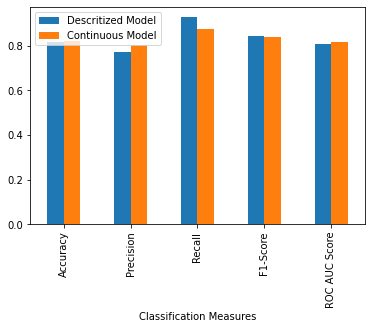

In [ ]:
res = pd.DataFrame({
    'Classification Measures': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC Score'],
    'Descritized Model': [acc1, pre1, rec1, f1s1, roc1],
    'Continuous Model': [acc2, pre2, rec2, f1s2, roc2]
})

res.plot(x='Classification Measures', y=['Descritized Model', 'Continuous Model'], kind='bar')